In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8,3)
plt.rcParams['figure.dpi'] = 150
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df = pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df.rename(columns= {'R&D Spend':'RD_spend', 'Marketing Spend':'marketing_spend'},inplace = True)

In [7]:
df.drop(columns = 'State', inplace = True)

<Axes: >

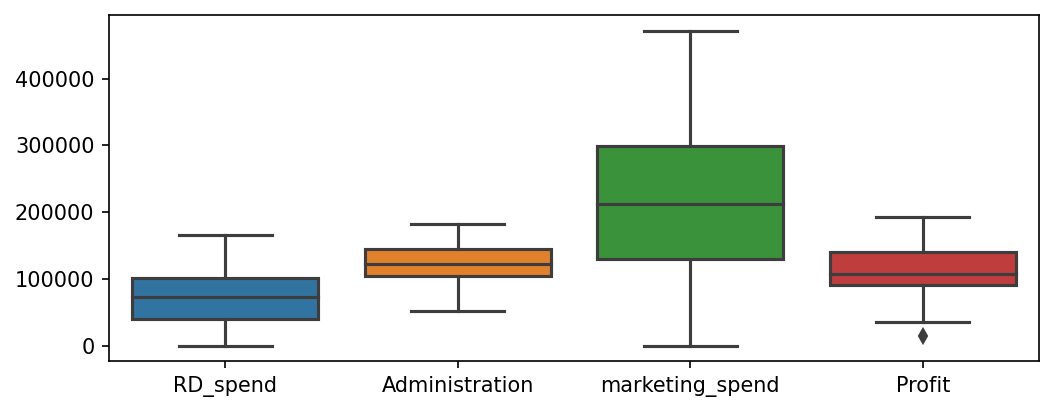

In [8]:
sns.boxplot(df)

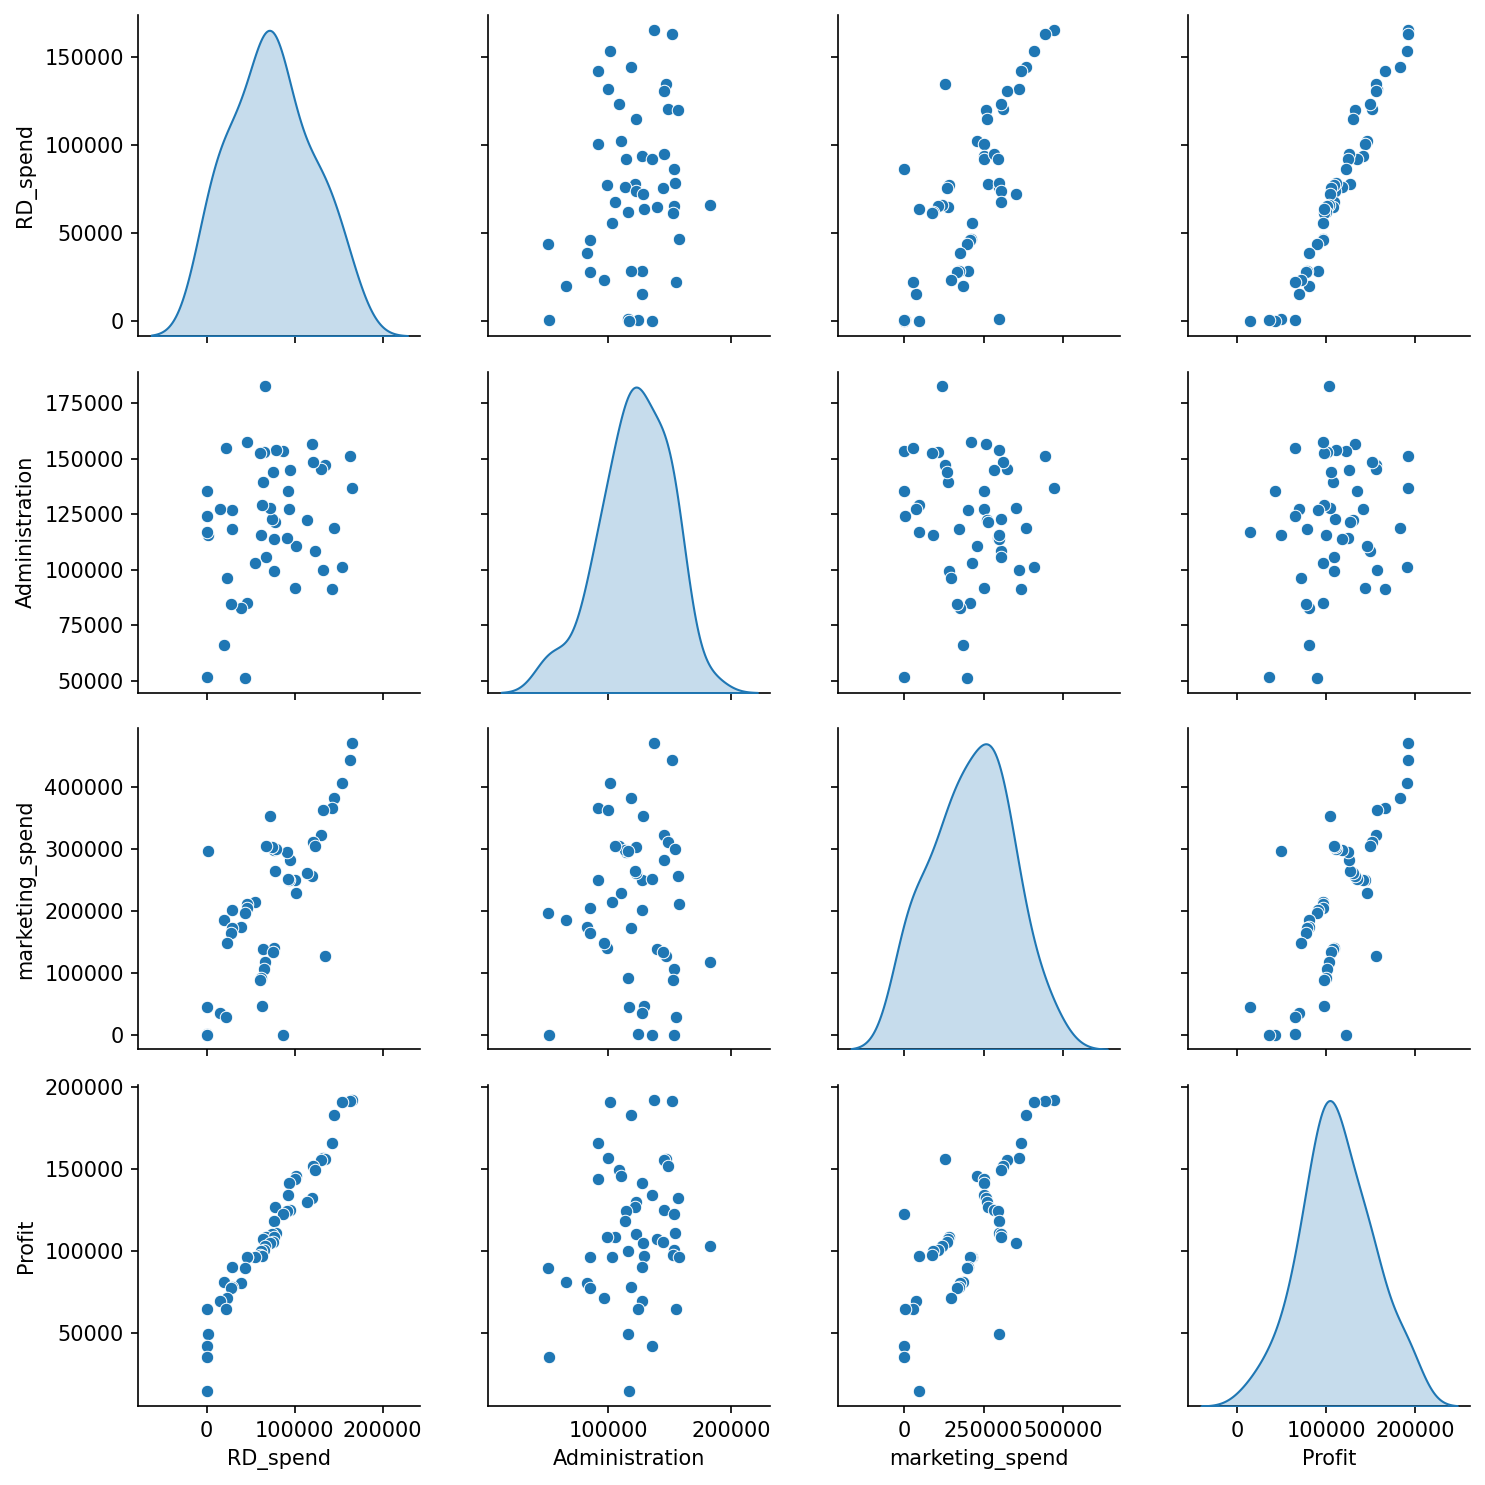

In [9]:
sns.pairplot(data = df, diag_kind = 'kde')
plt.tight_layout()

<Axes: ylabel='Density'>

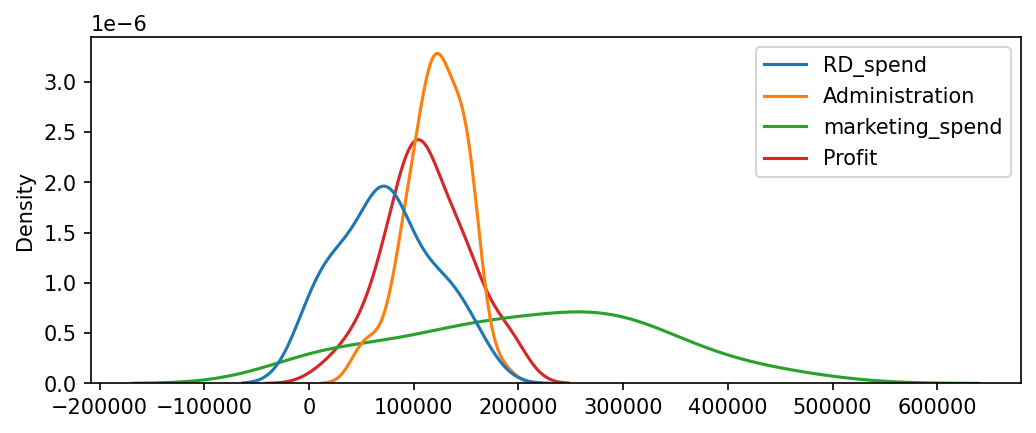

In [10]:
sns.kdeplot(df)

In [11]:
df.skew()

RD_spend           0.164002
Administration    -0.489025
marketing_spend   -0.046472
Profit             0.023291
dtype: float64

<Axes: >

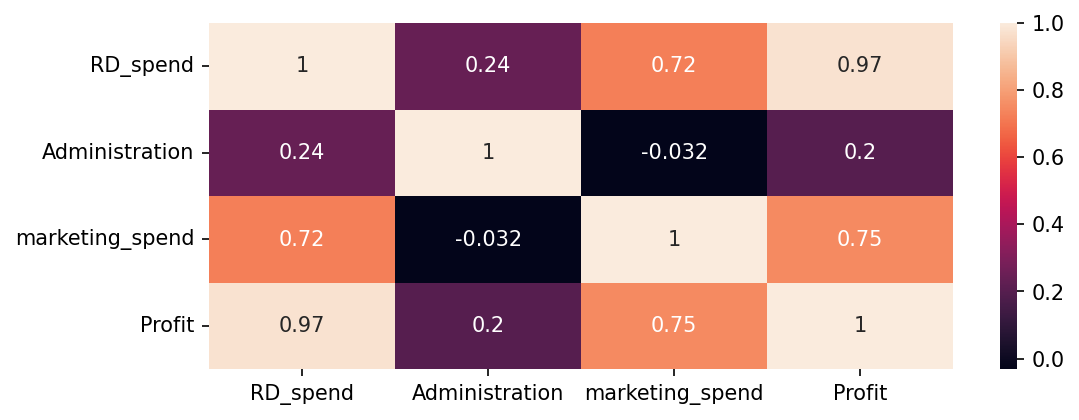

In [12]:
sns.heatmap(df.corr(), annot = True)

* The some multicollinearity present in between R&D Spend and Marketing Spend
* Use Variance inflation factor to detect the severity of multicollinearity

In [13]:
model = smf.ols('Profit~RD_spend+Administration+marketing_spend',data= df).fit()
model.pvalues

Intercept          1.057379e-09
RD_spend           2.634968e-22
Administration     6.017551e-01
marketing_spend    1.047168e-01
dtype: float64

In [14]:
model = smf.ols('Profit~Administration+marketing_spend',data= df).fit()
model.pvalues

Intercept          2.589341e-01
Administration     1.729198e-02
marketing_spend    9.727245e-11
dtype: float64

In [15]:
model = smf.ols('Profit~RD_spend+Administration',data= df).fit()
model.pvalues

Intercept         5.695336e-12
RD_spend          2.278348e-31
Administration    2.888932e-01
dtype: float64

* VIF Score

In [16]:
data = df.drop('Profit', axis=1)

In [17]:
data

,RD_spend,Administration,marketing_spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [18]:
vif = pd.DataFrame()
vif['feature'] = data.columns

In [19]:
vif

,feature
0,RD_spend
1,Administration
2,marketing_spend


In [20]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

In [21]:
vif

,feature,VIF
0,RD_spend,8.384571
1,Administration,4.026406
2,marketing_spend,7.593984


* as the VIF score of R&D spend and marketing spend are close enough we can confirm the check for multicolinearty and best perfoming feature out of these

In [22]:
model_rd = smf.ols('Profit~RD_spend+Administration', data = df).fit()
model_rd.rsquared, model_rd.aic

(0.9478129385009173, 1059.6636934567293)

In [23]:
model_ms = smf.ols('Profit~Administration+marketing_spend', data = df).fit()
model_ms.rsquared, model_ms.aic

(0.6097229746770663, 1160.2648038638672)

* From the above comparison we can confirm by comparing R squared and aic score that out of two correlated features R&D spend perfroms better, hence we eleminate Marketing spend feature for our final model

In [24]:
scaled_df = pd.DataFrame(sc.fit_transform(df), columns = df.columns)

<Axes: ylabel='Density'>

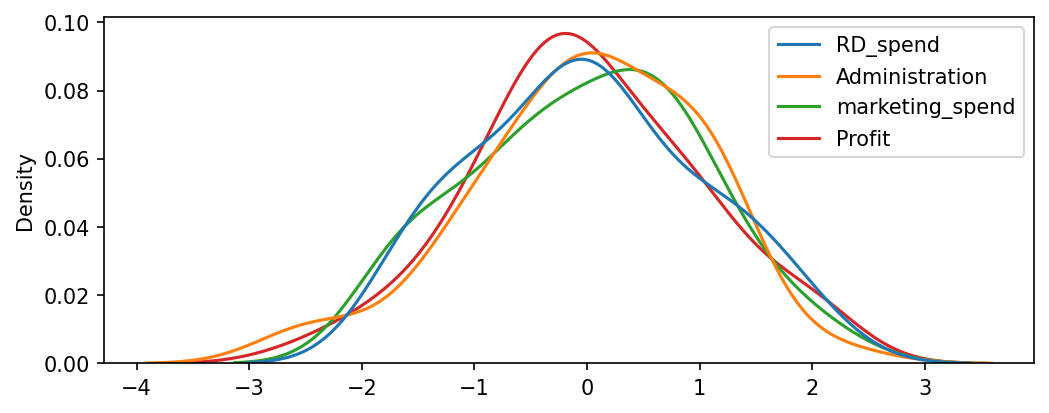

In [25]:
sns.kdeplot(scaled_df)

In [26]:
final_model= smf.ols('Profit~RD_spend+Administration', data = scaled_df).fit()

In [27]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           7.29e-31
Time:                        23:55:43   Log-Likelihood:                 2.8761
No. Observations:                  50   AIC:                            0.2478
Df Residuals:                      47   BIC:                             5.984
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.204e-16      0.033  -1.56e-14      1.000      -0.067       0.067
RD_spend           0.9818      0.034     28.589      0.000       0.913       1.051
Administration    -0.0368      0.034     -1.073      0.289      -0.106       0.032
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
final_model.pvalues

Intercept         1.000000e+00
RD_spend          2.278348e-31
Administration    2.888932e-01
dtype: float64

In [29]:
final_model.rsquared

0.9478129385009173

In [30]:
final_model.resid

0     0.052120
1     0.119028
2     0.231556
3     0.246569
4    -0.159610
5    -0.157871
6    -0.175876
7    -0.094081
8     0.032197
9    -0.142763
10    0.231453
11    0.186615
12    0.313893
13    0.182778
14   -0.435900
15   -0.431174
16    0.283048
17   -0.086049
18   -0.091915
19    0.038140
20    0.097291
21   -0.075318
22   -0.045600
23    0.030843
24   -0.187818
25    0.104378
26   -0.161823
27   -0.132010
28    0.028344
29   -0.058436
30   -0.056819
31   -0.050558
32   -0.132243
33   -0.012242
34    0.254592
35    0.161161
36    0.447192
37   -0.005343
38    0.310695
39   -0.068298
40    0.121452
41    0.084071
42    0.033288
43    0.206893
44   -0.015090
45    0.394894
46   -0.009830
47   -0.129066
48   -0.424509
49   -0.852248
dtype: float64

Text(0.5, 1.0, 'Q-Q Plot')

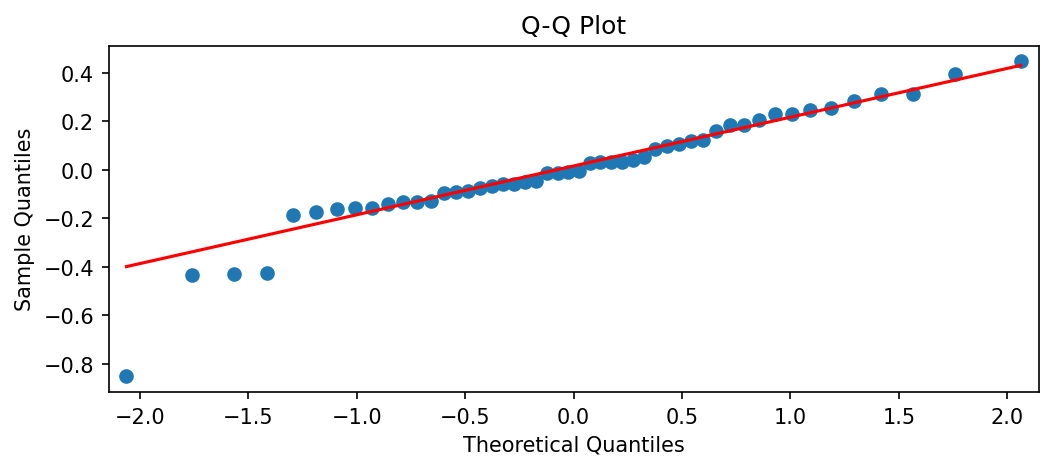

In [31]:
sm.qqplot(final_model.resid, line='q')
plt.title('Q-Q Plot')

In [32]:
np.argmin(final_model.resid),np.min(final_model.resid)

(49, -0.8522478895733072)

Text(0.5, 1.0, 'Residual Scatter plot')

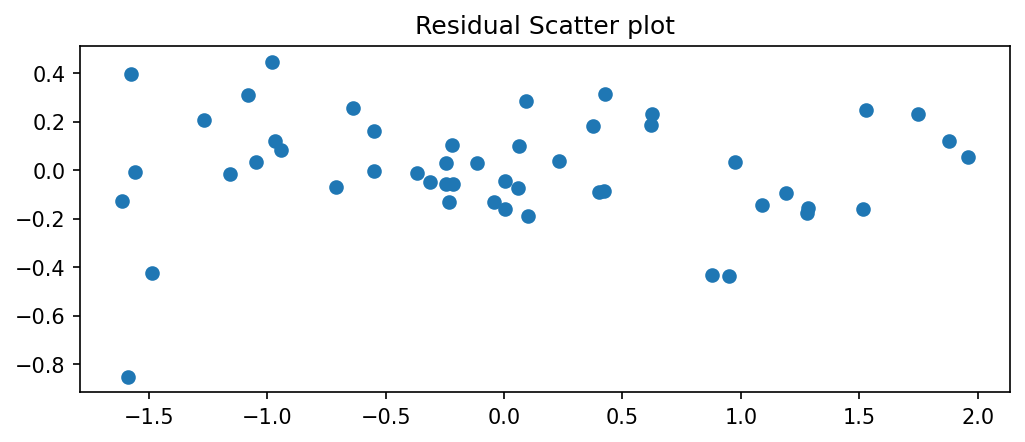

In [33]:
plt.scatter(final_model.fittedvalues, final_model.resid)
plt.title('Residual Scatter plot')

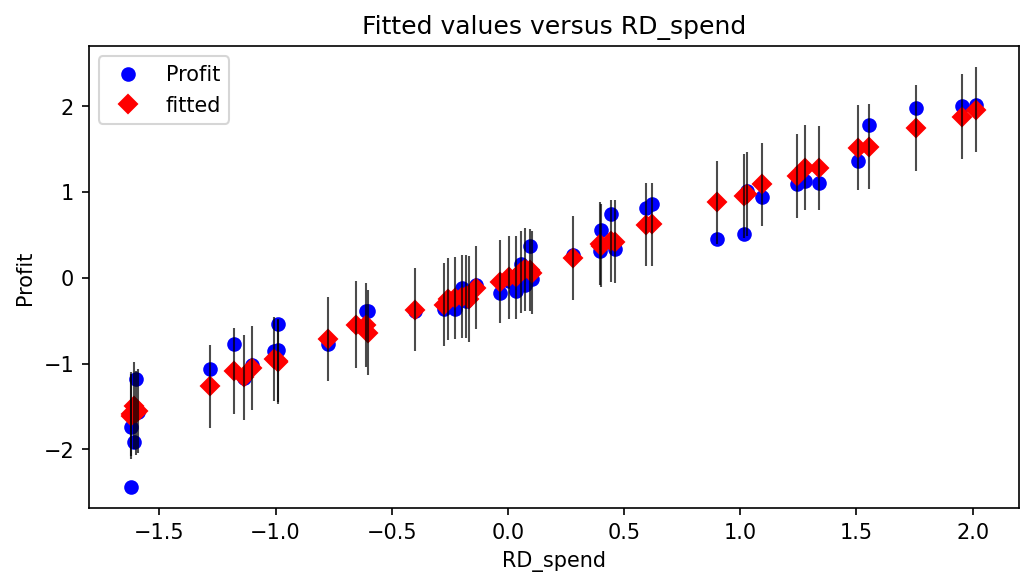

In [34]:
plt.rcParams['figure.figsize'] = (8,4)
sm.graphics.plot_fit(final_model, 'RD_spend');

In [35]:
#find the influence data
inf = final_model.get_influence()

c, p = inf.cooks_distance

In [36]:
c

array([2.04891117e-03, 1.10719705e-02, 4.45970340e-02, 3.10535270e-02,
       2.11438476e-02, 1.36907373e-02, 1.35107805e-02, 3.46841651e-03,
       3.66234828e-04, 7.51800918e-03, 1.16600707e-02, 1.36901599e-02,
       1.50207539e-02, 5.68804702e-03, 8.17568588e-02, 4.42094438e-02,
       1.01122046e-02, 1.72273244e-03, 1.37988343e-03, 4.50957682e-04,
       1.29256181e-03, 1.80511998e-03, 2.60725721e-04, 1.58579967e-04,
       7.75429813e-03, 2.18516446e-03, 5.74156819e-03, 2.32513846e-03,
       8.13668428e-04, 1.14848791e-03, 4.40912370e-04, 8.88021449e-04,
       2.58413417e-03, 2.86214125e-05, 3.26636622e-02, 9.81464013e-03,
       5.76430905e-02, 3.48387257e-05, 8.04974487e-02, 1.98645424e-03,
       3.84314890e-03, 3.15370564e-03, 3.93186682e-04, 1.70395623e-02,
       1.53194084e-04, 8.37159585e-02, 4.81274516e-05, 1.08495170e-02,
       2.61113283e-01, 3.75268147e-01])

<StemContainer object of 3 artists>

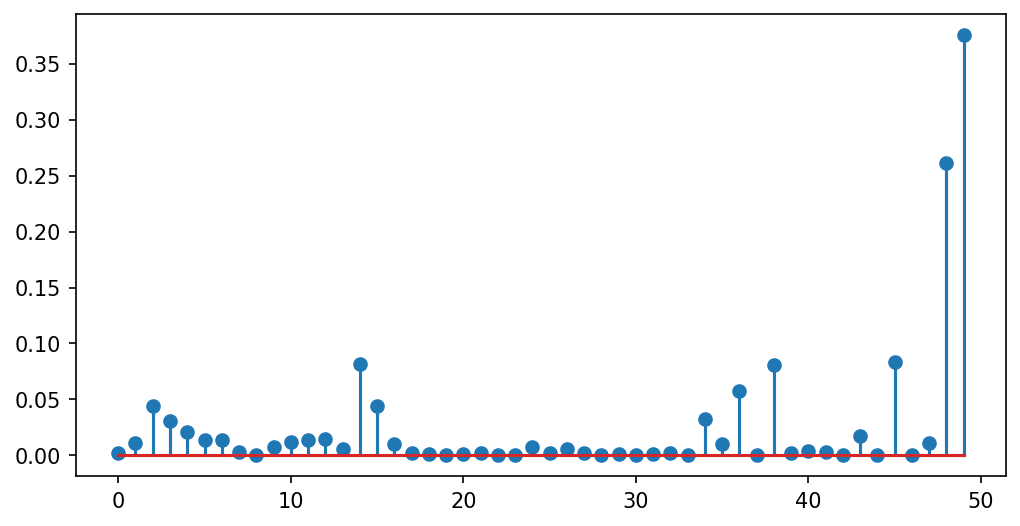

In [37]:
plt.stem(c)

In [38]:
k = len(df.columns)
n = len(df)

lv = 3*(k+1) / n

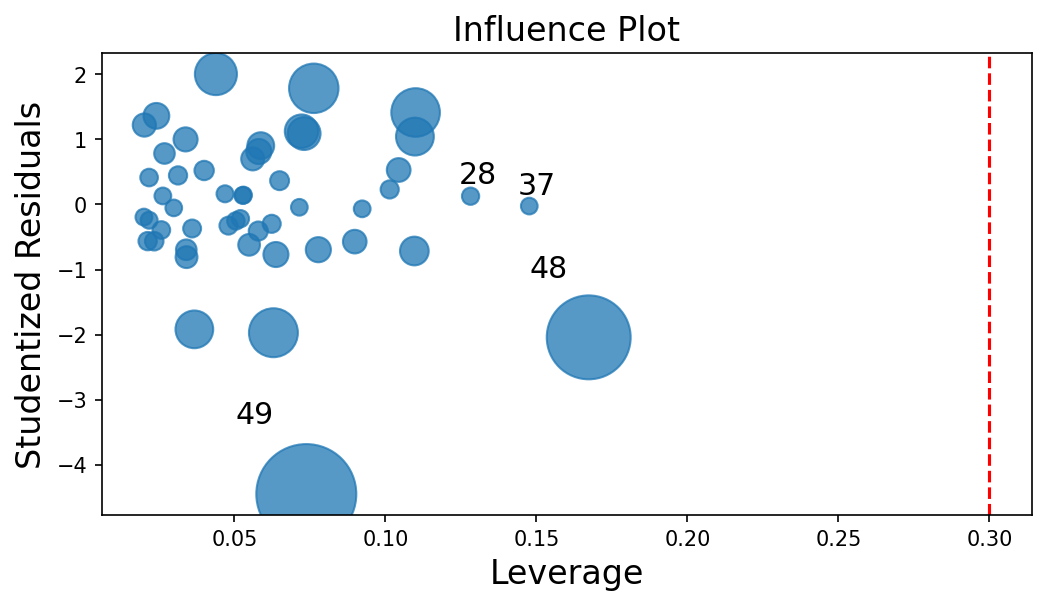

In [39]:
influence_plot(final_model)
plt.axvline(lv, linestyle = '--', color = 'red')


Model with R&D_spend and Adiministration feature is best performing feature.

There is no outler, influencetial data or leveraging data points.

From model validation confirm that the model is performing well.

From model deletion diagnostic confirm that there is no outlier to delete or deal with the performace of model is nominal.